<a href="https://colab.research.google.com/github/joaquimor/trilha-python-developer/blob/main/anova_serapilheira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving artigo.csv to artigo.csv
Resultados do Teste de Shapiro:
Mes
Apr     (0.9599278569221497, 0.7219075560569763)
Aug     (0.9456150531768799, 0.4949169158935547)
Dec    (0.9229113459587097, 0.24209930002689362)
Feb     (0.9499691128730774, 0.5602258443832397)
Jan     (0.9173954725265503, 0.2016841322183609)
Jul    (0.9154687523841858, 0.18915511667728424)
Jun     (0.9717164039611816, 0.8987420797348022)
Mar    (0.8934775590896606, 0.09073401242494583)
May     (0.9668452143669128, 0.8318692445755005)
Nov      (0.920385479927063, 0.2227199822664261)
Oct    (0.9400553703308105, 0.41903385519981384)
Sep    (0.9026405215263367, 0.12319319695234299)
dtype: object

Resultado do Teste de Levene:
LeveneResult(statistic=1.3916750344653113, pvalue=0.18166486251053995)

Tabela ANOVA:
                 sum_sq     df         F    PR(>F)
Mes        14897.722223   11.0  1.978951  0.033839
Residual  106762.014774  156.0       NaN       NaN

Resultados do Teste de Tukey:
 Multiple Comparison of Means

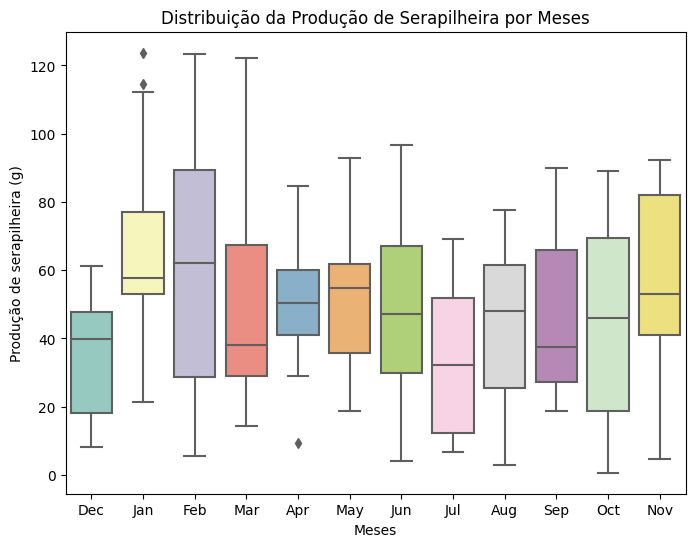


Resultado da ANOVA One Way:
F_onewayResult(statistic=nan, pvalue=nan)

Resumo da Regressão:
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.979
Date:                Fri, 28 Jul 2023   Prob (F-statistic):             0.0338
Time:                        23:00:08   Log-Likelihood:                -780.55
No. Observations:                 168   AIC:                             1585.
Df Residuals:                     156   BIC:                             1623.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [1]:
# Instalando os pacotes
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install seaborn
!pip install matplotlib

import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 1: Carregar os pacotes (não é necessário em Python, pois já estão instalados)
from google.colab import files

# Fazer o upload do arquivo artigo.csv
uploaded = files.upload()

# O nome do arquivo carregado será o nome da chave do dicionário 'uploaded'
# Neste caso, o nome da chave é 'artigo.csv'
nome_arquivo = next(iter(uploaded))

# Ler o arquivo 'artigo.csv' em um DataFrame pandas
import pandas as pd

# Passo 2: Carregar o banco de dados
dados = pd.read_csv('artigo.csv')

# Passo 3: Verificação da normalidade dos dados - Teste de Shapiro
shapiro_results = dados.groupby('Mes').apply(lambda x: stats.shapiro(x['Total']))
print("Resultados do Teste de Shapiro:")
print(shapiro_results)

# Passo 4: Verificação da homogeneidade de variâncias - Teste de Levene
levene_results = stats.levene(*[group['Total'] for name, group in dados.groupby('Mes')])
print("\nResultado do Teste de Levene:")
print(levene_results)

# Passo 5: Realização da ANOVA
anova_model = smf.ols('Total ~ Mes', data=dados).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nTabela ANOVA:")
print(anova_table)

# Passo 6: Análise post-hoc - Teste de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(dados['Total'], dados['Mes'])
print("\nResultados do Teste de Tukey:")
print(tukey_results)

# Passo 7: Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dados, x='Mes', y='Total', palette='Set3')
plt.xlabel("Meses")
plt.ylabel("Produção de serapilheira (g)")
plt.title("Distribuição da Produção de Serapilheira por Meses")
plt.show()

# ANOVA One Way (usando apenas para fins de exemplo)
anova_oneway = stats.f_oneway(dados['Total'][dados['Mes'] == 'JAN'],
                              dados['Total'][dados['Mes'] == 'FEV'],
                              dados['Total'][dados['Mes'] == 'MAR'],
                              dados['Total'][dados['Mes'] == 'ABR'],
                              dados['Total'][dados['Mes'] == 'MAI'],
                              dados['Total'][dados['Mes'] == 'JUN'],
                              dados['Total'][dados['Mes'] == 'JUL'],
                              dados['Total'][dados['Mes'] == 'AGO'],
                              dados['Total'][dados['Mes'] == 'SET'],
                              dados['Total'][dados['Mes'] == 'OUT'],
                              dados['Total'][dados['Mes'] == 'NOV'],
                              dados['Total'][dados['Mes'] == 'DEZ'])
print("\nResultado da ANOVA One Way:")
print(anova_oneway)

# Regressão (usando apenas para fins de exemplo)
regression_model = smf.ols('Total ~ Mes', data=dados).fit()
print("\nResumo da Regressão:")
print(regression_model.summary())
